## 2-4-3. Feature Selection Using Hybrid Method (Random Shuffling with Feature Engine)

We can implement feature selection by feature shuffling with Feature-engine.

The selector takes any machine learning algorithm as input, and any metric from those allowed by Scikit-learn.

### A. Import Python libraries

In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from feature_engine.selection import SelectByShuffling

### B. Set City Name and Import City Data

In [2]:
# set city name
city_data = "1_goyang_city.xlsx"
CITY_NAME_Eng = "GoYang-City"

In [3]:
# Read excel file using pandas
df = pd.read_excel(open(f"../../data/{city_data}", 'rb'), sheet_name="training", header=4, index_col=0)
# Remove unnecessary columns for this analysis
df = df.iloc[2:]
# Change Date Format and Set Date as index
df.index = pd.to_datetime(df.index.str.strip(), format='%Y-%m')
df.index.name = "date"
# Change data format from "Object" to "Float"
df["water_supply"] = df.water_supply.astype(float)
df["Total_Population"] = df.Total_Population.astype(float)
# Delete unnecessary columns 
df.drop(columns=df.columns[19:21], inplace=True)
df.drop(columns=df.columns[22:23], inplace=True)
# Select clean data
df = df.loc["2010-01-01":]
df

,water_supply,Total_Population,Households,Population_per_Households,Male_Population,Female_Population,Male_Female_Ratio,Population_aging_Ratio,Power_usage,Num_of_Business,...,personal_expense,benefits_vs_personal_expense,employment_ratio,employment_insurance_ratio,Average_Temp,Monthly_Rainfall,Average_Relative_Humadity,Ground_Temp,Average_Wind,Average_Pressure
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,282265.709677,939497.0,353741.0,2.655889,463878.0,475619.0,0.975314,0.088,434436000.0,20326.0,...,104371555.0,0.191,99001.0,0.105377,-4.5,29.3,0.65,-1.2,2.3,1013.6
2010-02-01,273685.892857,940639.0,354266.0,2.655177,464518.0,476121.0,0.975630,0.088,418156000.0,20685.0,...,104371555.0,0.191,99893.0,0.106197,1.4,55.3,0.59,1.4,2.4,1010.7
2010-03-01,269918.193548,940982.0,354003.0,2.658119,464740.0,476242.0,0.975848,0.088,346653000.0,20809.0,...,104371555.0,0.191,99678.0,0.105930,4.3,82.5,0.59,5.0,2.9,1009.6
2010-04-01,274462.700000,941737.0,354192.0,2.658832,465148.0,476589.0,0.975994,0.088,356701000.0,21857.0,...,104371555.0,0.191,101594.0,0.107879,9.5,62.8,0.54,10.8,2.9,1007.4
2010-05-01,288537.806452,941724.0,354157.0,2.659058,465110.0,476614.0,0.975863,0.089,313793000.0,21739.0,...,104371555.0,0.191,102073.0,0.108390,17.2,124.0,0.62,18.7,2.6,1000.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,354382.451613,1080896.0,454793.0,2.376677,528972.0,551924.0,0.958415,0.140,487867544.0,46416.0,...,218316665.0,0.293,171845.0,0.158984,25.9,211.2,0.74,28.2,2.1,998.6
2021-09-01,343537.800000,1080787.0,455501.0,2.372743,528911.0,551876.0,0.958387,0.141,401433572.0,45514.0,...,218316665.0,0.293,172771.0,0.159857,22.6,131.0,0.71,24.6,2.3,1003.4
2021-10-01,340126.806452,1080240.0,455845.0,2.369753,528683.0,551557.0,0.958528,0.142,358286760.0,45839.0,...,218316665.0,0.293,173486.0,0.160599,15.6,57.0,0.70,16.7,2.1,1011.0


### C. Hybrid Methods: Selection using Random Shuffling with Feature Engine

* Split Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['water_supply'], axis=1),
    df['water_supply'],
    test_size=0.2,
    random_state=0)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train.shape, X_test.shape

((115, 24), (29, 24))

#### Train ML algo with all features

In [5]:
# In this case, I will build Random Forests, but remember that
# you can use this procedure for any machine learning algorithm

# I build few and shallow trees to avoid overfitting
rf = RandomForestRegressor(n_estimators=100,
                           max_depth=3,
                           random_state=2909,
                           n_jobs=4)


#### Shuffle features and asses performance drift

In [6]:
sel = SelectByShuffling(
    variables=None, # automatically examines all numerical variables
    estimator=rf, # the estimator
    scoring='neg_root_mean_squared_error', # the performance metric
    threshold=None, # threshold will be mean value of metric accross features
    cv=3,#  cross validation
    random_state=1 # seed
)

sel.fit(X_train, y_train)

SelectByShuffling(estimator=RandomForestRegressor(max_depth=3, n_jobs=4,
                                                  random_state=2909),
                  random_state=1, scoring='neg_root_mean_squared_error')

In [7]:
# performance of model trained using all features

sel.initial_model_performance_

-7251.054776040931

<Axes: >

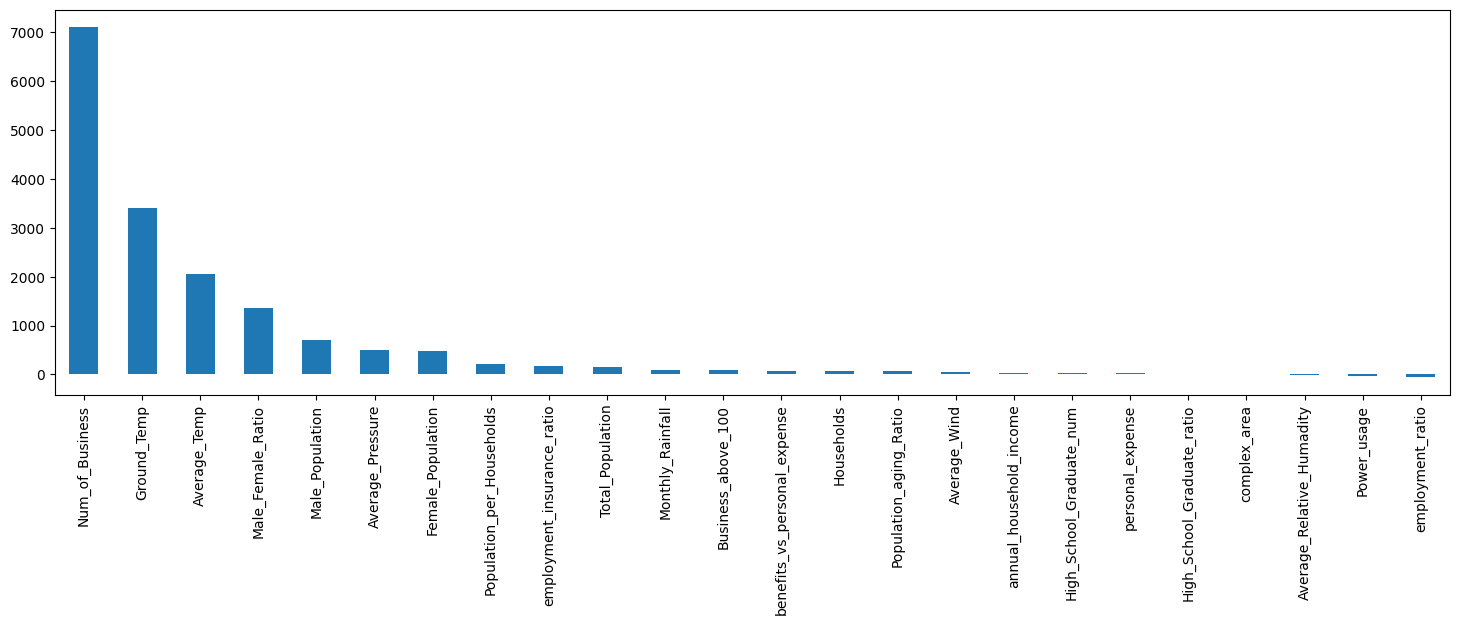

In [8]:
# performance drifts

pd.Series(sel.performance_drifts_).sort_values(ascending=False).plot.bar(figsize=(18,5))

In [9]:
sel.features_to_drop_

['Total_Population',
 'Households',
 'Population_per_Households',
 'Female_Population',
 'Population_aging_Ratio',
 'Power_usage',
 'Business_above_100',
 'complex_area',
 'annual_household_income',
 'High_School_Graduate_num',
 'High_School_Graduate_ratio',
 'personal_expense',
 'benefits_vs_personal_expense',
 'employment_ratio',
 'employment_insurance_ratio',
 'Monthly_Rainfall',
 'Average_Relative_Humadity',
 'Average_Wind',
 'Average_Pressure']

In [10]:
len(sel.features_to_drop_)

19

In [11]:
# select the features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((115, 5), (29, 5))

In [12]:
X_train.columns

Index(['Male_Population', 'Male_Female_Ratio', 'Num_of_Business',
       'Average_Temp', 'Ground_Temp'],
      dtype='object')

In [13]:
results_f = pd.DataFrame()
results_f["hybrid shuffle with Feature Engine"] = [list(X_train.columns.values)]
results_f.to_csv(f'./results/{CITY_NAME_Eng}_hybrid_shuffle_with_FE_results.csv')
results_f

,hybrid shuffle with Feature Engine
0,"[Male_Population, Male_Female_Ratio, Num_of_Bu..."


In [14]:
# check model performance using only selected features
rf.fit(X_train, y_train)

# print performance metrics
print('train rmse: ', mean_squared_error(y_train, rf.predict(X_train), squared=False))
print('train r2: ', r2_score(y_train, (rf.predict(X_train))))
print()
print('test rmse: ', mean_squared_error(y_test, rf.predict(X_test), squared=False))
print('test r2: ', r2_score(y_test, rf.predict(X_test)))

train rmse:  4931.258664839631
train r2:  0.9476149388487761

test rmse:  9553.084178741345
test r2:  0.8324587721194511
